HW2. Task 4. Алина Щукина

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind

Сгенерируем 100000 значений из распределения Пуассона, которые потенциально могли бы описывать посещаемость, например, какой-то страницы в Интернете в течение дня. И по графику, и по самой природе нашей генерации чисел мы видим, что данные не имеют нормального распределения. 

In [2]:
attendance = np.random.poisson(5, 100000)

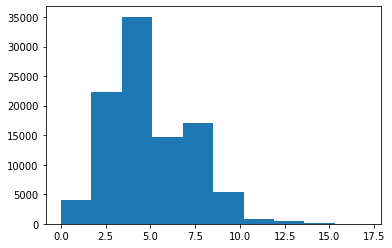

In [3]:
plt.hist(attendance)
plt.show()

In [4]:
np.random.seed(101)

In [5]:
positive = 0
negative = 0
alpha = 0.05

aa_test_size = 1500
aa_control_size = 1500
sample_size = aa_test_size + aa_control_size

for sample_last in np.arange(start=sample_size - 1, stop=len(attendance), step=sample_size):
    
    sample_first = sample_last - sample_size + 1
    
    aa_test = attendance[sample_first:sample_first + aa_test_size]
    
    aa_control = attendance[sample_first + aa_test_size:sample_last + 1]
    
    p_value = ttest_ind(aa_test, aa_control, alternative='larger', usevar='unequal')[1]
    if p_value <= alpha:
        positive += 1
    else:
        negative += 1
    
print(f'FPR is {positive / (positive + negative):.3f}')


FPR is 0.061


Допустим, такое распределение посещаемости на сайте было до того, как на нём произошли какие-либо изменения. Таким образом, гипотеза о равенстве средних двух любых подвыборок из этого распределения должна не отвергаться. Возьмём тестовую и контрольную выборки размером 1500 каждая, и будем итеративно проводить тесты. Если тест будет отвергать гипотезу (то есть делать ложное открытие), будем считать это за ошибку, и в итоге посчитаем False Positive Rate. В нашем случае он получился 0.061 при заявленной альфе 0.05. Таким образом, с помощью AA-Монте-Карло мы увидели, что в нашей задаче критерий Стьюдента не даёт долю ошибок первого рода (False Positive Rate), равную заявленной альфе.